<a href="https://colab.research.google.com/github/sarthakbiswas97/customer-churn-ml-system/blob/main/telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd

df = pd.read_csv('Telco_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [138]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [139]:
# checking missing values
df.isnull().sum()
# this only cathces NaN values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [140]:
# checking class balance
df['Churn'].value_counts()

# to get the percentage
df['Churn'].value_counts(normalize=True)*100

# Imbalance ratio is nearly 2.77

,proportion
Churn,
No,73.463013
Yes,26.536987


In [141]:
df['TotalCharges'].value_counts()
# check for non-numeric values in numeric columns TotalCharges
invalid_total_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
invalid_total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- df.isnull().sum() -> this only catches NaN
- if there is empty string "", or blank space " ", or random text "abc",
  it doesn't catches that.

- pd.to_numeric(..., errors='coerce') -> tries to convert text to numbers.

In [142]:
df[df['TotalCharges'].str.strip() == ""]
# those exact 11 rows which are empty for TotalCharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**What’s numeric vs categorical**

In [143]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [144]:
# list of object features
# df.select_dtypes(include='object').columns
# include='object' or exclude='number'  both are same
cat_cols = df.select_dtypes(exclude='number').columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [145]:
# list of numerical features
num_cols = df.select_dtypes(include='number').columns
num_cols
# df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].dtypes

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [146]:
# failed to convert
pd.to_numeric(df['TotalCharges'], errors='coerce').isna().sum()

np.int64(11)

In [147]:
# blank spaces which blocks the conversion
df['TotalCharges'].loc[df['TotalCharges'].str.strip() == ""]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


- Initially no missing values
- Churn count (yes:1869, no: 5174)
- Imbalance Ratio 2.77
---
Issues to fix
- 11 empty strings in TotalCharges column, which blocked the conversion
- target distribution

In [148]:
# blanks to NaN
df['TotalCharges'] = df['TotalCharges'].replace("", "0")

# now check how many conversions failed
# pd.to_numeric(df["TotalCharges"], errors='coerce').isna().sum()

In [149]:
# print those total charges which are empty strings
# df[df['TotalCharges'].str.strip() == '']

# only that column’s values printed which are empty strings
df.loc[df['TotalCharges'].str.strip() == '']

# select empty total charges along with tenure
df.loc[df['TotalCharges'].str.strip() == '', ['tenure','TotalCharges']]

# here we can see that where tenure = 0, there total charges is 0
# which means that user is new and there is charge generated yet
# so removing them is not good, but we can simply assgin them 0
# Genereic imputation like mean or median is also not good


,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


Instead of treating them with a generic imputation like mean or median:
- Convert those empty strings into NaN so the column can be numeric.
- Fill them with 0, because if tenure = 0, the total charges should logically be 0.
- Keep the column numeric so it’s ready for modeling.


In [150]:
# empty strings to NaN
df['TotalCharges'] = df['TotalCharges'].str.strip().replace('', pd.NA)

# 2. Convert column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Fill NaN with 0 only for tenure = 0 (only where totalcharges is missing after
# conversion and tenure = 0 ), preserves existing correct numeric data.
mask = (df['TotalCharges'].isna()) & (df['tenure'] == 0)
df.loc[mask, 'TotalCharges'] = 0


# - this logic assumes all tenure=0 should have 0 regardless of existing value
# - even though in this dataset it will work fine, but by this logic there is
# - potential data loss if there were legitimate non-zero values for tenure = 0 customers
# - (no NaN check here)
# df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [151]:
# print all the TotalCharges where tenure=0
df.loc[df['tenure'] == 0, 'TotalCharges']

,TotalCharges
488,0.0
753,0.0
936,0.0
1082,0.0
1340,0.0
3331,0.0
3826,0.0
4380,0.0
5218,0.0
6670,0.0


In [152]:
# drop the column customerID, because identity feature is of no use
df.drop('customerID', axis=1, inplace=True)

In [153]:
import numpy as np

# identifying which columns are numeric
num_cols = df.select_dtypes(include=np.number).columns.tolist()

num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

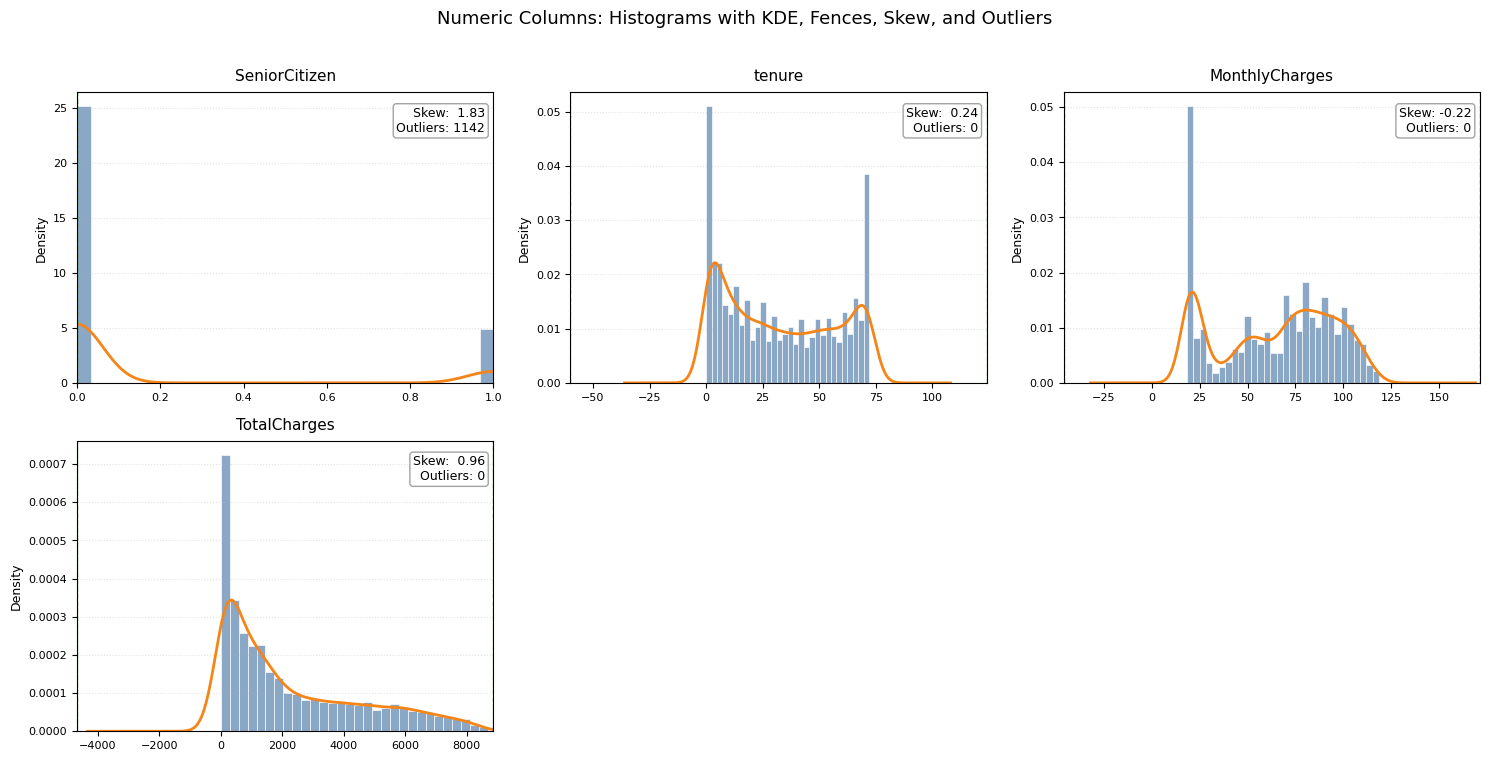

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumptions:
# - df is your DataFrame
# - numeric_cols is a list of numeric column names (e.g., from df.select_dtypes(include=np.number).columns.tolist())

def plot_numeric_histograms_with_kde(df, numeric_cols, bins=30, fig_cols=3, figsize_per_plot=(5, 3.8)):
    # Layout
    n = len(numeric_cols)
    if n == 0:
        print("No numeric columns to plot.")
        return
    fig_rows = int(np.ceil(n / fig_cols))
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(fig_cols*figsize_per_plot[0], fig_rows*figsize_per_plot[1]))
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        s = pd.to_numeric(df[col], errors="coerce").dropna()

        if s.empty:
            ax.set_visible(False)
            continue

        # Basic stats
        q1, q3 = np.percentile(s, [25, 75])
        iqr = q3 - q1
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr
        outlier_mask = (s < lower_fence) | (s > upper_fence)
        outlier_count = int(outlier_mask.sum())
        skew_val = s.skew()

        # Choose bins robustly (fallback if bins is "auto")
        bin_count = bins if isinstance(bins, int) else 30

        # Histogram
        ax.hist(s, bins=bin_count, color="#4C78A8", alpha=0.65, edgecolor="white", linewidth=0.7, density=True)

        # KDE using pandas (matplotlib-based backend)
        try:
            s.plot(kind="kde", ax=ax, color="#F58518", linewidth=2)
        except Exception:
            # If KDE fails (e.g., too few unique points), skip gracefully
            pass

        # Visual fences for outliers
        ax.axvline(lower_fence, color="#54A24B", linestyle="--", linewidth=1, alpha=0.9)
        ax.axvline(upper_fence, color="#54A24B", linestyle="--", linewidth=1, alpha=0.9)

        # Title and labels
        ax.set_title(f"{col}", fontsize=11, pad=8)
        ax.set_xlabel("")  # cleaner grid; xlabel not necessary per-plot
        ax.set_ylabel("Density", fontsize=9)
        ax.grid(True, axis="y", linestyle=":", alpha=0.35)

        # Annotation block: skew and outliers
        skew_text = f"Skew: {skew_val: .2f}"
        outlier_text = f"Outliers: {outlier_count}"
        ax.text(0.98, 0.95, f"{skew_text}\n{outlier_text}",
                transform=ax.transAxes, ha="right", va="top",
                fontsize=9, bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#999999", alpha=0.9))

        # Tick formatting to avoid clutter
        ax.tick_params(axis="both", labelsize=8)

        # Optional: limit x-range to include fences for context
        xmin = min(s.min(), lower_fence)
        xmax = max(s.max(), upper_fence)
        ax.set_xlim(xmin, xmax)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Overall figure adjustments
    fig.suptitle("Numeric Columns: Histograms with KDE, Fences, Skew, and Outliers", fontsize=13, y=0.995)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


# Example usage:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plot_numeric_histograms_with_kde(df, numeric_cols, bins=30, fig_cols=3)


Takeaways
- Only TotalCharges has noticeable skew that might affect model later(may improve with log transform).

- SeniorCitizen should be treated as a categorical variable.

- No immediate outlier removal — nothing looks like a data entry error.

In [155]:
#  get all the unique value count for every categorical column
# print("All the categorical features and there cardinality.")
# print(df.select_dtypes('object').nunique())
# print("________*****_________")


# for specific cardinality of any feature
# df['PaymentMethod'].value_counts(dropna=False)

# Identify which columns are categorical
categorical_df = df.select_dtypes(include='object')

cat_cols = categorical_df.columns.tolist()

print(categorical_df.nunique())
print("*************************\n")

for col in cat_cols:
  print(df[col].value_counts(dropna=False))
  print("__________")




gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64
*************************

gender
Male      3555
Female    3488
Name: count, dtype: int64
__________
Partner
No     3641
Yes    3402
Name: count, dtype: int64
__________
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
__________
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
__________
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
__________
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
__________
OnlineSecurity
No                     3498
Yes                    2019
No intern

**Encoding Strategies**
- One-Hot Encode: InternetService, PaymentMethod, gender, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling

- Ordinal Encode: Contract

- Binary Encode: SeniorCitizen (0/1)

- Numeric: StandardScaler on tenure, MonthlyCharges, TotalCharges

# Train/val/test splits and base pipeline spec


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [157]:
# split dataset

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=0, stratify=y_temp)

# numerical and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()


print(X_train.columns)
print("_____")
print(y_train.head())


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
_____
5229    Yes
5668     No
1667     No
6709     No
3609     No
Name: Churn, dtype: object


In [158]:
print(num_cols)
print("_____")
print(cat_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
_____
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [159]:
# preprocessing pipeline
# for numerical features
# impute missing with median
# scale with StandardScaler

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [160]:
# for categorical features
# impute missing with most frequent
# one-hot encoding
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [161]:
# combine with column trasformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [162]:
#  logistic regression baseline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=2000, class_weight='balanced'))
])

In [163]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [164]:
# Train the model with the corrected pipeline
clf.fit(X_train, y_train)

# Validation performance
val_score = clf.score(X_val, y_val)
print("Validation Accuracy:", val_score)

# If satisfied with performance/hyperparams → Final Test
test_score = clf.score(X_test, y_test)
print("Test Accuracy:", test_score)

y_val_proba_lr = clf.predict_proba(X_val)[:, 1]   # probabilities for positive class
y_val_pred_lr  = clf.predict(X_val)

from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc_lr = roc_auc_score(y_val, y_val_proba_lr)
pr_auc_lr  = average_precision_score(y_val, y_val_proba_lr, pos_label='Yes')

print("______")

print("y_val_proba_clf", y_val_proba_lr)
print("y_val_pred_clf", y_val_pred_lr)

print("______")
print("roc_auc_lr: ", roc_auc_lr)
print("pr_auc_lr: ", pr_auc_lr)

Validation Accuracy: 0.7547348484848485
Test Accuracy: 0.7464522232734153
______
y_val_proba_clf [0.02096646 0.73639193 0.37122222 ... 0.79832585 0.2722774  0.60590192]
y_val_pred_clf ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']
______
roc_auc_lr:  0.8539580265095729
pr_auc_lr:  0.6529739069772302


**Evaluate logistic regression on validation**

Precision-Recall AUC on validation set: 0.6518


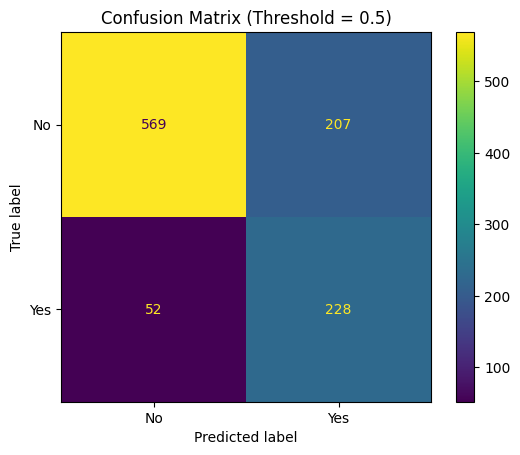

In [165]:
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate Precision-Recall AUC on the validation set
precision, recall, _ = precision_recall_curve(y_val, y_val_proba_lr, pos_label='Yes')
pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC on validation set: {pr_auc:.4f}")

# Calculate and display the confusion matrix with a threshold of 0.5
cm = confusion_matrix(y_val, y_val_pred_lr, labels=['No', 'Yes'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

disp.plot()
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.show()

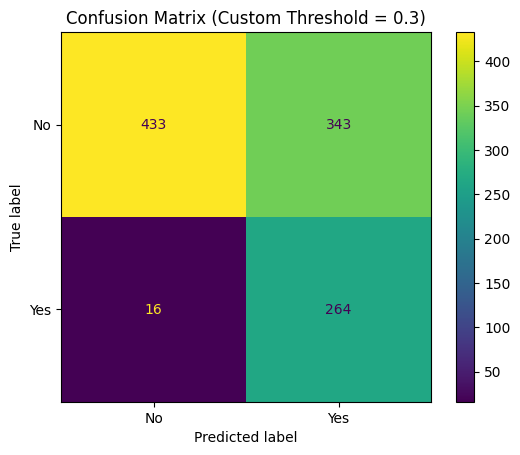

In [166]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class ('Yes') on the validation set
y_val_proba_lr = clf.predict_proba(X_val)[:, 1]

# Define the custom threshold
custom_threshold = 0.3

# Apply the custom threshold to get binary predictions
# If the probability is >= custom_threshold, predict 'Yes', otherwise predict 'No'
y_val_pred_custom_threshold = np.where(y_val_proba_lr >= custom_threshold, 'Yes', 'No')

# Calculate and display the confusion matrix with the custom threshold
cm_custom = confusion_matrix(y_val, y_val_pred_custom_threshold, labels=['No', 'Yes'])
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=['No', 'Yes'])

disp_custom.plot()
plt.title(f'Confusion Matrix (Custom Threshold = {custom_threshold})')
plt.show()

- precision recall is ~65%, which is poor performance

Confusion Matrix (at Threshold = 0.5)
----
TN = 569 (correctly predicted "No churn")

FP = 207 (predicted churn, but actually no churn)

FN = 52 (predicted no churn, but actually churn → missed churners)

TP = 228 (correctly predicted churners).

---

Accuracy = (TP + TN) / Total = (569+228)/(1056) ≈ 75%

Precision = TP / (TP + FP) = 228 / (228+207) ≈ 0.52

Recall = TP / (TP + FN) = 228 / (228+52) ≈ 0.81

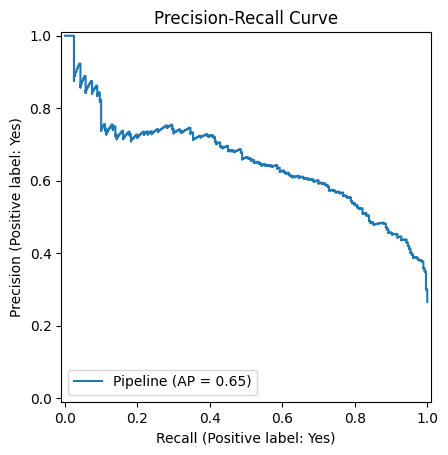

In [167]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Plot ROC curve
# roc_display = RocCurveDisplay.from_estimator(clf, X_val, y_val, pos_label='Yes')
# roc_display.ax_.set_title('ROC Curve')
# plt.show()

# Plot Precision-Recall curve
pr_display = PrecisionRecallDisplay.from_estimator(clf, X_val, y_val, pos_label='Yes')
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

# Random forest baseline (train + validate)

In [168]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# Fit on TRAIN
rf_pipeline.fit(X_train, y_train)

# Predictions on VAL
y_val_proba_rf = rf_pipeline.predict_proba(X_val)[:, 1]
y_val_pred_rf  = rf_pipeline.predict(X_val)

evaluate rf on validation

In [169]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report

roc_auc_rf = roc_auc_score(y_val, y_val_proba_rf)
pr_auc_rf  = average_precision_score(y_val, y_val_proba_rf, pos_label='Yes')
cm_rf      = confusion_matrix(y_val, y_val_pred_rf)
report_rf  = classification_report(y_val, y_val_pred_rf, digits=4)

print("RF (val) ROC-AUC: {:.4f}".format(roc_auc_rf))
print("RF (val) PR-AUC : {:.4f}".format(pr_auc_rf))
print("Confusion matrix (threshold=0.5):\n", cm_rf)
print("\nClassification report:\n", report_rf)

RF (val) ROC-AUC: 0.8511
RF (val) PR-AUC : 0.6466
Confusion matrix (threshold=0.5):
 [[564 212]
 [ 57 223]]

Classification report:
               precision    recall  f1-score   support

          No     0.9082    0.7268    0.8074       776
         Yes     0.5126    0.7964    0.6238       280

    accuracy                         0.7453      1056
   macro avg     0.7104    0.7616    0.7156      1056
weighted avg     0.8033    0.7453    0.7587      1056



model comparison

In [170]:
val_summary = {
    "logistic_regression": {"roc_auc": roc_auc_lr, "pr_auc": pr_auc_lr},
    "random_forest": {"roc_auc": roc_auc_rf, "pr_auc": pr_auc_rf}
}
print(val_summary)


# ROC-AUC → measures how well the model separates
# churners vs. non-churners across all thresholds.

# PR-AUC → measures how well the model identifies churners when
# the dataset is imbalanced (focuses on precision & recall).

{'logistic_regression': {'roc_auc': np.float64(0.8539580265095729), 'pr_auc': np.float64(0.6529739069772302)}, 'random_forest': {'roc_auc': np.float64(0.8511321796759941), 'pr_auc': np.float64(0.6466318597442107)}}


Final test evaluation

In [171]:
best_pipeline = clf

y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]
y_test_pred  = best_pipeline.predict(X_test)

from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report

test_roc = roc_auc_score(y_test, y_test_proba)
test_pr  = average_precision_score(y_test, y_test_proba, pos_label='Yes')
test_cm   = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=4)

print("FINAL Test ROC-AUC: {:.4f}".format(test_roc))
print("FINAL Test PR-AUC : {:.4f}".format(test_pr))
print("Confusion matrix (0.5):\n", test_cm)
print("\nClassification report:\n", test_report)


FINAL Test ROC-AUC: 0.8372
FINAL Test PR-AUC : 0.6470
Confusion matrix (0.5):
 [[564 212]
 [ 56 225]]

Classification report:
               precision    recall  f1-score   support

          No     0.9097    0.7268    0.8080       776
         Yes     0.5149    0.8007    0.6267       281

    accuracy                         0.7465      1057
   macro avg     0.7123    0.7638    0.7174      1057
weighted avg     0.8047    0.7465    0.7598      1057



save models and metrics

In [172]:
import joblib, json
import os

# Create directories if they don't exist
os.makedirs("models", exist_ok=True)
os.makedirs("reports", exist_ok=True)

# Save the best pipeline model
joblib.dump(best_pipeline, "models/best_pipeline.pkl")

# Save metrics
final_metrics = {
    "validation": val_summary,
    "test": {"roc_auc": float(test_roc), "pr_auc": float(test_pr)}
}
with open("reports/baseline_metrics.json", "w") as f:
    json.dump(final_metrics, f, indent=2)

# Threshold sweep

In [173]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.1, 1.0, 0.05)
results = []

for t in thresholds:
    y_pred_thresh = (y_val_proba_lr >= t).astype(int)
    # Convert predicted labels to strings to match y_val
    y_pred_thresh_str = np.where(y_pred_thresh == 1, 'Yes', 'No')
    prec = precision_score(y_val, y_pred_thresh_str, pos_label='Yes')
    rec = recall_score(y_val, y_pred_thresh_str, pos_label='Yes')
    results.append({"threshold": t, "precision": prec, "recall": rec})


results_df = pd.DataFrame(results)
print(results_df)

    threshold  precision    recall
0        0.10   0.341493  0.996429
1        0.15   0.372813  0.989286
2        0.20   0.391557  0.960714
3        0.25   0.413043  0.950000
4        0.30   0.434926  0.942857
5        0.35   0.452128  0.910714
6        0.40   0.480620  0.885714
7        0.45   0.496829  0.839286
8        0.50   0.524138  0.814286
9        0.55   0.552500  0.789286
10       0.60   0.572626  0.732143
11       0.65   0.605178  0.667857
12       0.70   0.628253  0.603571
13       0.75   0.654545  0.514286
14       0.80   0.726115  0.407143
15       0.85   0.727273  0.228571
16       0.90   0.888889  0.057143
17       0.95   0.000000  0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [174]:
chosen = results_df[results_df["precision"] >= 0.7].sort_values("recall", ascending=False).head(1)
print(chosen)


    threshold  precision    recall
14        0.8   0.726115  0.407143


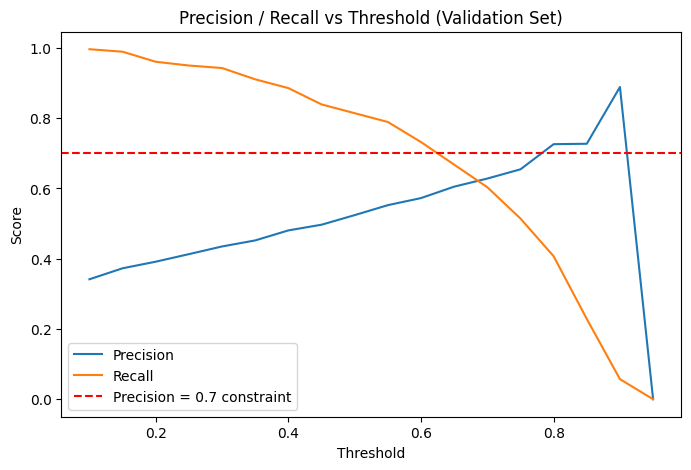

In [175]:
#  visualize presision-recall vs threshold

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results_df["threshold"], results_df["precision"], label="Precision")
plt.plot(results_df["threshold"], results_df["recall"], label="Recall")
plt.axhline(0.7, color="red", linestyle="--", label="Precision = 0.7 constraint")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall vs Threshold (Validation Set)")
plt.legend()
plt.show()


In [176]:
# threshold manifest

import json

threshold_manifest = {
    "chosen_threshold": float(chosen["threshold"].values[0]),
    "constraint": "precision >= 0.7",
    "validation_precision": float(chosen["precision"].values[0]),
    "validation_recall": float(chosen["recall"].values[0])
}

with open("reports/threshold_decision.json", "w") as f:
    json.dump(threshold_manifest, f, indent=2)

print(json.dumps(threshold_manifest, indent=2))


{
  "chosen_threshold": 0.8000000000000002,
  "constraint": "precision >= 0.7",
  "validation_precision": 0.7261146496815286,
  "validation_recall": 0.40714285714285714
}


In [177]:
# apply choosen threshold for test set

best_threshold = threshold_manifest["chosen_threshold"]

y_test_proba = clf.predict_proba(X_test)[:, 1]
y_test_pred_thresh = (y_test_proba >= best_threshold).astype(int)

# Convert predicted labels to strings to match y_test
y_test_pred_thresh_str = np.where(y_test_pred_thresh == 1, 'Yes', 'No')


from sklearn.metrics import precision_score, recall_score, confusion_matrix

test_prec = precision_score(y_test, y_test_pred_thresh_str, pos_label='Yes')
test_rec  = recall_score(y_test, y_test_pred_thresh_str, pos_label='Yes')
cm_test   = confusion_matrix(y_test, y_test_pred_thresh_str)

print(f"Test Precision @ {best_threshold:.2f}: {test_prec:.3f}")
print(f"Test Recall    @ {best_threshold:.2f}: {test_rec:.3f}")
print("Confusion matrix:\n", cm_test)

Test Precision @ 0.80: 0.709
Test Recall    @ 0.80: 0.399
Confusion matrix:
 [[730  46]
 [169 112]]


# Refine preprocessing and add domain features

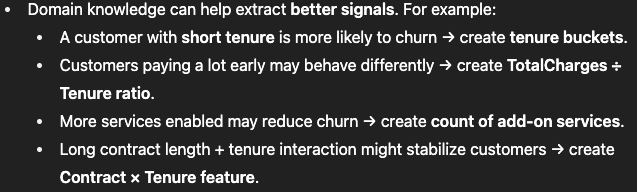


In [178]:
from sklearn.base import BaseEstimator, TransformerMixin

class DomainFeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # 1. Tenure buckets
        X["tenure_bucket"] = pd.cut(
            X["tenure"],
            bins=[0, 12, 24, 48, 72, np.inf],
            labels=["0-12m", "12-24m", "24-48m", "48-72m", "72m+"]
        )

        # 2. Charges per month (avoid div by zero)
        X["charges_per_month"] = X["TotalCharges"] / np.maximum(X["tenure"], 1)

        # 3. Count of enabled add-on services
        addon_cols = [
            "OnlineSecurity", "OnlineBackup", "DeviceProtection",
            "TechSupport", "StreamingTV", "StreamingMovies"
        ]
        X["addon_services_count"] = (X[addon_cols] == "Yes").sum(axis=1)

        # 4. Contract × tenure interaction
        contract_map = {"Month-to-month": 1, "One year": 12, "Two year": 24}
        X["contract_tenure_interaction"] = (
            X["Contract"].map(contract_map) * X["tenure"]
        )

        return X


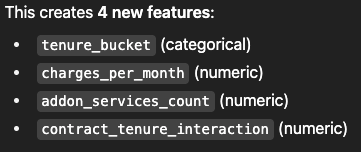

In [179]:
# insert the features in the pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numeric columns again, including new features
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "tenure_bucket"]

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges",
                "charges_per_month", "addon_services_count",
                "contract_tenure_interaction"]

# Transformers
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Full pipeline with feature engineering
lr_pipeline = Pipeline(steps=[
    ("features", DomainFeatureEngineer()),
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [180]:
#  retrain and compare with baseline model

from sklearn.metrics import average_precision_score, precision_recall_curve

lr_pipeline.fit(X_train, y_train)

y_val_proba = lr_pipeline.predict_proba(X_val)[:, 1]
pr_auc = average_precision_score(y_val, y_val_proba, pos_label="Yes")


print("Scores on retrained model after feature addition \nyes")
print("Logistic Regression PR-AUC on validation set:", pr_auc)


# ----------------------
#  pr_auc on test data

y_test_proba = lr_pipeline.predict_proba(X_test)[:, 1]
test_pr_auc = average_precision_score(y_test, y_test_proba, pos_label="Yes")

print("Logistic Regression PR-AUC on test set:", test_pr_auc)

Scores on retrained model after feature addition 
yes
Logistic Regression PR-AUC on validation set: 0.6704410168426976
Logistic Regression PR-AUC on test set: 0.661799261882044


In [181]:
print("Baseline Logistic Regression Test PR-AUC:", final_metrics["test"]["pr_auc"])
print("Retrained Logistic Regression Test PR-AUC:", test_pr_auc)

Baseline Logistic Regression Test PR-AUC: 0.6470310183253238
Retrained Logistic Regression Test PR-AUC: 0.661799261882044


side by side thershold comparison

In [185]:
from sklearn.metrics import precision_score, recall_score

# Get probabilities
baseline_proba = clf.predict_proba(X_test)[:, 1]
day7_proba = lr_pipeline.predict_proba(X_test)[:, 1]


import pandas as pd
import numpy as np # Import numpy

thresholds = [0.2, 0.3, 0.4, 0.5]
results = []

for t in thresholds:
    # Baseline
    baseline_pred = (baseline_proba >= t).astype(int)
    # Convert predicted labels to strings
    baseline_pred_str = np.where(baseline_pred == 1, 'Yes', 'No')
    b_prec = precision_score(y_test, baseline_pred_str, pos_label="Yes")
    b_rec = recall_score(y_test, baseline_pred_str, pos_label="Yes")

    # Day 7
    day7_pred = (day7_proba >= t).astype(int)
    # Convert predicted labels to strings
    day7_pred_str = np.where(day7_pred == 1, 'Yes', 'No')
    d_prec = precision_score(y_test, day7_pred_str, pos_label="Yes")
    d_rec = recall_score(y_test, day7_pred_str, pos_label="Yes")

    results.append({
        "Threshold": t,
        "Baseline_Precision": round(b_prec, 3),
        "Baseline_Recall": round(b_rec, 3),
        "Day7_Precision": round(d_prec, 3),
        "Day7_Recall": round(d_rec, 3),
    })

comparison_df = pd.DataFrame(results)
print(comparison_df)

   Threshold  Baseline_Precision  Baseline_Recall  Day7_Precision  Day7_Recall
0        0.2               0.387            0.954           0.480        0.875
1        0.3               0.430            0.922           0.532        0.740
2        0.4               0.472            0.868           0.569        0.619
3        0.5               0.515            0.801           0.643        0.520
